## Homework 2 - Sunspot data

In the `Data` directory of this repository, you will find a file called `sunspots.txt`, which contains the observed number of sunspots on the Sun for each month since January 1749. The file contains two columns of numbers, the first being the month and the second being the sunspot multiplicity for that month.

a) Write a program that reads in the data and makes a graph of sunspot multiplicity as a function of time.

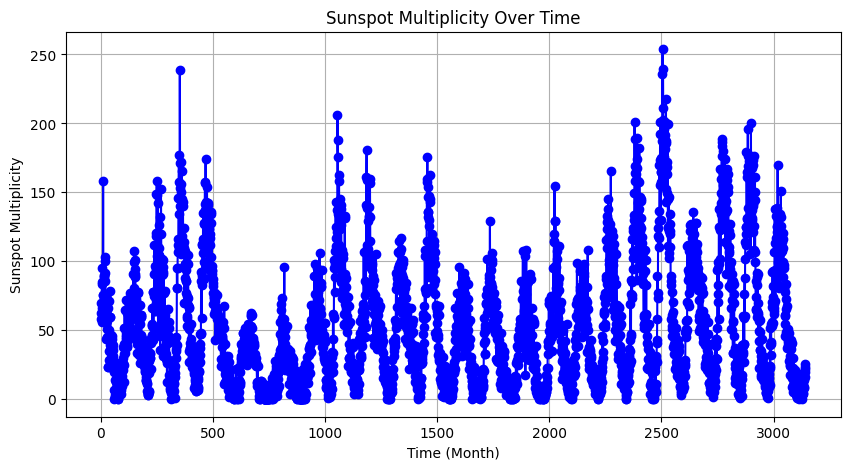

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

time = []
sunspot_multiplicity = []

with open('/sunspots.txt', 'r') as file:
    for line in file:
        columns = line.split()
        time.append(float(columns[0]))
        sunspot_multiplicity.append(float(columns[1]))


plt.figure(figsize=(10, 5))
plt.plot(time, sunspot_multiplicity, marker='o', linestyle='-', color='b')
plt.title('Sunspot Multiplicity Over Time')
plt.xlabel('Time (Month)')
plt.ylabel('Sunspot Multiplicity')
plt.grid(True)
plt.show()



b) Modify your program to display only 1000 data points on the graph (avoid the first and last 5 data points).

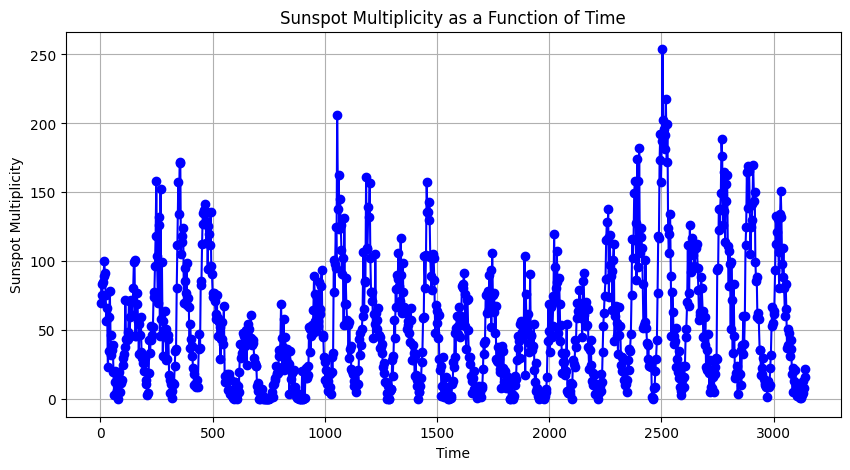

In [45]:
import numpy as np
import matplotlib.pyplot as plt




selected_indices = np.linspace(2, len(data) - 1, 1002, dtype=int)
selected_data = data[selected_indices]


time = selected_data[:, 0]
sunspot_multiplicity = selected_data[:, 1]


plt.figure(figsize=(10, 5))
plt.plot(time, sunspot_multiplicity, marker='o', linestyle='-', color='b')
plt.title('Sunspot Multiplicity as a Function of Time')
plt.xlabel('Time')
plt.ylabel('Sunspot Multiplicity')
plt.grid(True)
plt.show()

c) Modify your program further to calculate and plot the running average of the data, defined by
$$Y_k=\frac{1}{2r+1}\sum_{m=-r}^r y_{k+m}$$
where $r = 5$ in this case (and the $y_k$ are the sunspot multiplicities). Plot both the original data and the running average on the same graph, again over the same 1000 data points.  Be sure to include a legend.

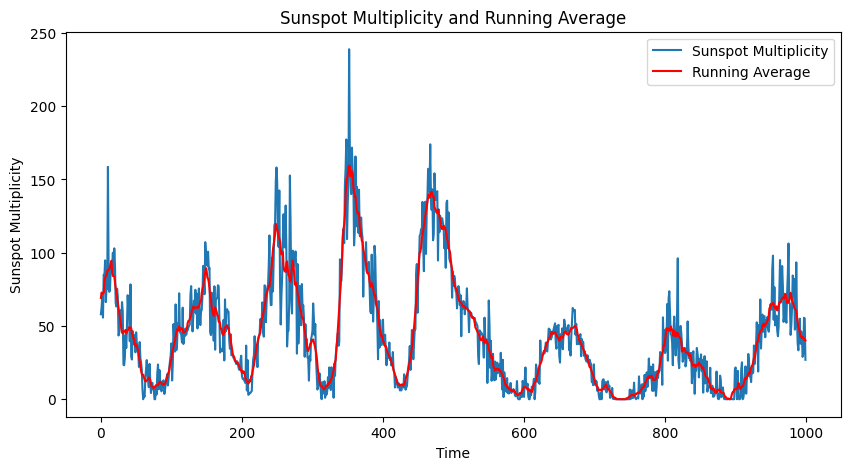

In [48]:
import numpy as np
import matplotlib.pyplot as plt


def read_data(file_path):
    data = np.loadtxt(file_path)
    return data


def running_average(data, r):
    n = len(data)
    avg_data = np.zeros(n)
    for k in range(n):
        start = max(0, k - r)
        end = min(n, k + r + 1)
        avg_data[k] = np.mean(data[start:end])
    return avg_data


def main():
    file_path = '/sunspots.txt'
    data = read_data(file_path)


    if len(data) > 1000:
        data = data[:1000]

    time = data[:, 0]
    sunspot_multiplicity = data[:, 1]


    plt.figure(figsize=(10, 5))
    plt.plot(time, sunspot_multiplicity, label='Sunspot Multiplicity')


    r = 5
    avg_data = running_average(sunspot_multiplicity, r)
    plt.plot(time, avg_data, label='Running Average', color='red')

    plt.xlabel('Time')
    plt.ylabel('Sunspot Multiplicity')
    plt.title('Sunspot Multiplicity and Running Average')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()